# Impact of Voice-Activated Artificial Intelligence Devices

### This portion of the project will collect data and analyze 2 questions

* What shares do different smart speakers own in the market?
* What do consumers buy using voice activated AI devices?

In [1]:
%matplotlib notebook

In [2]:
# Import dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [62]:
# Import data into Pandas from CSV

# Import Smart Speakers Consumer Report from March 2019
smart_file = "Resources/smart_speaker_consumer_adoption_report_2019.csv"

# Import Voice Shopping Consumer Report from June 2018
shop_file = "Resources/voice-shopping-consumer-adoption-report-june-2018.csv"

# Set CSV files into Dataframes
smart_df = pd.read_csv(smart_file)
shop_df = pd.read_csv(shop_file)

### What shares do different smart speakers own in the market?

In [4]:
# Display Smart Speakers Consumer Report Dataframe
smart_df.head()

,brand_2019,device,smart_display_2018,usage_2019,usage_2018,number_devices_2019,number_devices_2018,living_room,bedroom,kitchen,...,health_and_wellness,none_of_the_above,celebrities,politics,local_business,travel,other,professional_work_related,finance_banking_investing,fashion
0,Amazon,Amazon Echo Dot,Amazon Alexa,Daily,Daily,1,1,no,no,yes,...,no,no,no,no,yes,no,no,no,no,no
1,Google,Google Home Mini,None,Monthly,Monthly,1,1,no,yes,no,...,no,yes,no,no,no,no,no,no,yes,no
2,Amazon,Amazon Echo Dot,None,Monthly,Daily,3,4,yes,no,yes,...,yes,no,no,no,no,no,no,yes,no,no
3,Other,Other,None,Daily,Daily,5-10,10+,yes,yes,no,...,no,no,no,no,no,no,no,yes,no,no
4,Amazon,Amazon Echo or Plus,None,Never/Rarely,Monthly,2,2,yes,yes,no,...,no,no,no,no,no,no,no,no,no,no


In [5]:
# Create a dataframe with only the relevant columns from the dataset that surveyed smart speakers device models
device_df = pd.DataFrame({"Brand": smart_df["brand_2019"],
              "Device": smart_df["device"]})

# Display new dataframe
device_df.head()

,Brand,Device
0,Amazon,Amazon Echo Dot
1,Google,Google Home Mini
2,Amazon,Amazon Echo Dot
3,Other,Other
4,Amazon,Amazon Echo or Plus


In [6]:
# Get total number of surveyed
smart_surveyed_total = len(device_df["Device"])


print(f"There are a total of {smart_surveyed_total} smart device owners surveyed.")

There are a total of 1038 smart device owners surveyed.


In [7]:
# Group by Devices
device_group = device_df.groupby("Device")

# Device name list
device_name = device_group["Device"].unique().str[0]

# Count list
device_count = device_group["Device"].count()

# Display devices and counts
device_count

Device
Amazon Echo Dot        326
Amazon Echo Show        31
Amazon Echo Spot        36
Amazon Echo or Plus    241
Apple HomePad           28
Google Home            117
Google Home Hub         12
Google Home Max          2
Google Home Mini       117
Other                  105
Sonos One               23
Name: Device, dtype: int64

In [8]:
# Create a dataframe from the new data
final_devices_df = pd.DataFrame({"Devices": device_name,
                                 "Count": device_count})

# Display dataframe
final_devices_df.style.hide_index()

Devices,Count
Amazon Echo Dot,326
Amazon Echo Show,31
Amazon Echo Spot,36
Amazon Echo or Plus,241
Apple HomePad,28
Google Home,117
Google Home Hub,12
Google Home Max,2
Google Home Mini,117
Other,105


<IPython.core.display.Javascript object>


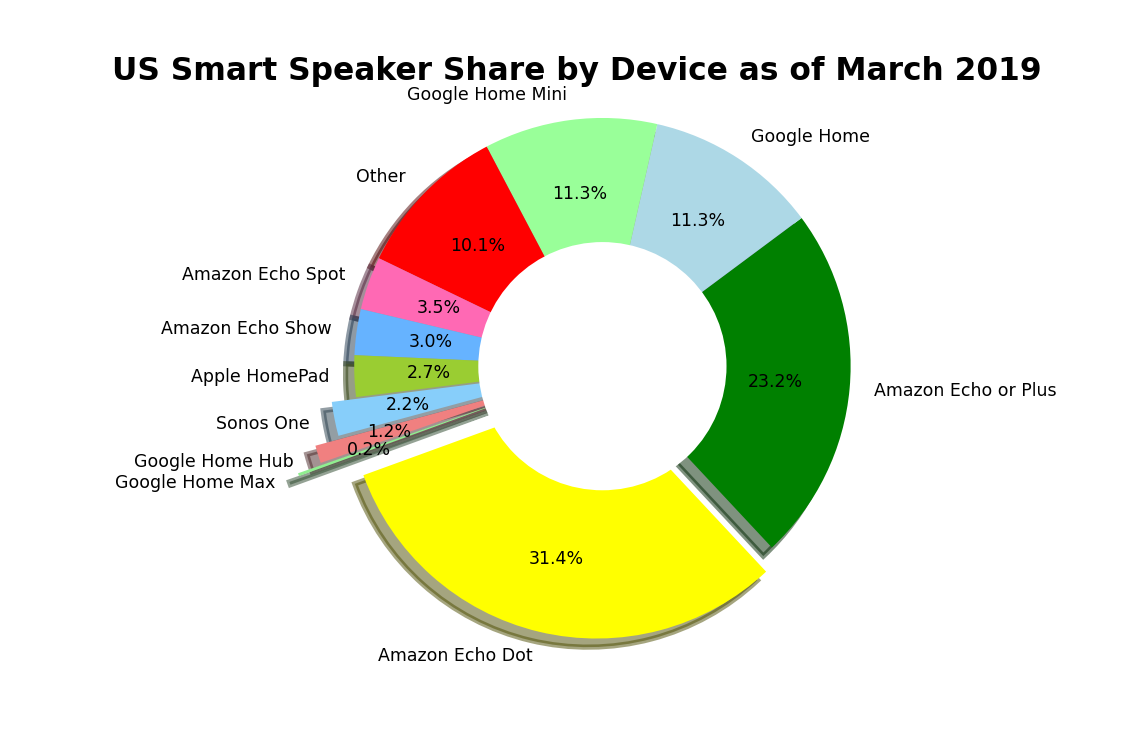

In [29]:
# Plot a pie chart

# Sort the values
pie_sort = final_devices_df.sort_values("Count", ascending = False)

# Define variables
pie_name = pie_sort["Devices"]
pie_count = pie_sort["Count"]
plt.figure(figsize=[9, 6])
explode = (0.1,0,0,0,0,0,0,0,0.1,0.2,0.3)
colors = ["yellow",
          "green",
          "lightblue",
          "#99ff99",
          "red",
          "hotpink",
          "#66b3ff",
          "yellowgreen",
          "lightskyblue",
          "lightcoral",
          "lightgreen"]

# Plot pie
plt.figure(1)
plt.pie(pie_count,
        labels=pie_name,
        autopct='%1.1f%%',
        colors = colors,
        explode = explode,
        shadow = True,
        pctdistance = 0.7,
        wedgeprops = {'linewidth': 3},
        startangle = 200)

# Set to equal
plt.axis("equal")

# Add a title
plt.title("US Smart Speaker Share by Device as of March 2019", fontsize=18, fontweight = 'bold')

# Plot a circle in the center
centre_circle = plt.Circle((0,0),0.5,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Display pie chart
plt.show()

In [10]:
# Save and export pie plot to png

plt.savefig("Output_Files/Device_market_shares.png")

### What do consumers buy using voice activated AI devices?

In [63]:
# Display Voice Shopping Consumer Report Dataframe
shop_df.head()

,shopping_method,own_smartphone,have_tried_a_voice_assistant,own_a_smart_speaker,own_feature_phone,no_mobile_device,shoppers_use_voice,online_apparel,online_everyday_household_items,online_entertainment_music_movies,...,voice_entertainment_music_movies,voice_consumer_electronics,voice_travel,voice_games,voice_groceries,voice_appliances,voice_furniture,voice_prepared_meal_or_drink,voice_none_of_the_above,voice_local_services
0,physical,no,no,no,no,no,no,yes,yes,no,...,no,yes,no,yes,no,no,no,no,no,no
1,physical,yes,no,no,no,no,yes,no,no,yes,...,no,yes,no,no,no,no,no,no,yes,no
2,physical,yes,yes,no,no,yes,no,yes,yes,no,...,no,no,no,no,no,no,no,no,no,no
3,website,yes,yes,no,no,no,no,yes,yes,no,...,yes,no,no,no,no,yes,no,no,no,no
4,physical,yes,yes,no,no,no,no,yes,yes,no,...,no,no,no,no,no,no,no,yes,no,no


In [64]:
# Create a dataframe with only the relevant columns from the dataset that surveyed consumer shopping habits
shop_df = pd.DataFrame({"Apparel": shop_df["voice_apparel"],
                        "Everyday Household Items": shop_df["voice_everyday_household_items"],
                        "Entertainment, Music, Movies": shop_df["voice_entertainment_music_movies"],
                        "Consumer Elctronics": shop_df["voice_consumer_electronics"],
                        "Travel": shop_df["voice_travel"],
                        "Games": shop_df["voice_games"],
                        "Groceries": shop_df["voice_groceries"],
                        "Appliances": shop_df["voice_appliances"],
                        "Furniture": shop_df["voice_furniture"],
                        "Prepared Meal or Drink": shop_df["voice_prepared_meal_or_drink"],
                        "None of the Above": shop_df["voice_none_of_the_above"],
                        "Local Services": shop_df["voice_local_services"]})

# Display new dataframe
shop_df.head()

,Apparel,Everyday Household Items,"Entertainment, Music, Movies",Consumer Elctronics,Travel,Games,Groceries,Appliances,Furniture,Prepared Meal or Drink,None of the Above,Local Services
0,no,no,no,yes,no,yes,no,no,no,no,no,no
1,no,no,no,yes,no,no,no,no,no,no,yes,no
2,no,no,no,no,no,no,no,no,no,no,no,no
3,yes,yes,yes,no,no,no,no,yes,no,no,no,no
4,no,no,no,no,no,no,no,no,no,yes,no,no


In [65]:
# Get total number of surveyed
consumer_surveyed_total = len(shop_df["Travel"])


print(f"There are a total of {consumer_surveyed_total} shopping consumers surveyed.")

There are a total of 1203 shopping consumers surveyed.


In [66]:
# Create new dataframe from column names
categories = list(shop_df.columns)
consumer_df = pd.DataFrame({"Categories": categories})
consumer_df

,Categories
0,Apparel
1,Everyday Household Items
2,"Entertainment, Music, Movies"
3,Consumer Elctronics
4,Travel
5,Games
6,Groceries
7,Appliances
8,Furniture
9,Prepared Meal or Drink


In [68]:
# Count the number of yes replies

apparel_yes = shop_df[shop_df["Apparel"] == "yes"]
apparel_yes = apparel_yes["Apparel"].count()

household_yes = shop_df[shop_df["Everyday Household Items"] == "yes"]
household_yes = household_yes["Everyday Household Items"].count()

entertainment_yes = shop_df[shop_df["Entertainment, Music, Movies"] == "yes"]
entertainment_yes = entertainment_yes["Entertainment, Music, Movies"].count()

#entertainment_count = entertainment_yes["Entertainment, Music, Movies"].count()
#entertainment_pct = entertainment_count/consumer_surveyed_total
#entertainment_pct.style.format('{:.2%}')

electronics_yes = shop_df[shop_df["Consumer Elctronics"] == "yes"]
electronics_yes = electronics_yes["Consumer Elctronics"].count()

travel_yes = shop_df[shop_df["Travel"] == "yes"]
travel_yes = travel_yes["Travel"].count()

games_yes = shop_df[shop_df["Games"] == "yes"]
games_yes = games_yes["Games"].count()

groceries_yes = shop_df[shop_df["Groceries"] == "yes"]
groceries_yes = groceries_yes["Groceries"].count()

appliances_yes = shop_df[shop_df["Appliances"] == "yes"]
appliances_yes = appliances_yes["Appliances"].count()

furniture_yes = shop_df[shop_df["Furniture"] == "yes"]
furniture_yes = furniture_yes["Furniture"].count()

meal_yes = shop_df[shop_df["Prepared Meal or Drink"] == "yes"]
meal_yes = meal_yes["Prepared Meal or Drink"].count()

none_yes = shop_df[shop_df["None of the Above"] == "yes"]
none_yes = none_yes["None of the Above"].count()

services_yes = shop_df[shop_df["Local Services"] == "yes"]
services_yes = services_yes["Local Services"].count()

In [16]:
# Add values to dataframe with a new column name
consumer_df["Use Voice Count"] = [entertainment_yes,
                                  electronics_yes,
                                  travel_yes,
                                  games_yes,
                                  groceries_yes,
                                  appliances_yes,
                                  furniture_yes,
                                  meal_yes,
                                  none_yes,
                                  services_yes]

consumer_df

,Categories,Use Voice Count
0,"Entertainment, Music, Movies",254
1,Consumer Elctronics,175
2,Travel,143
3,Games,228
4,Groceries,143
5,Appliances,101
6,Furniture,111
7,Prepared Meal or Drink,85
8,None of the Above,286
9,Local Services,42


In [69]:
# Add another column with the percentages

consumer_df["Use Voice %"] = [apparel_yes/consumer_surveyed_total,
                              household_yes/consumer_surveyed_total,
                              entertainment_yes/consumer_surveyed_total,
                              electronics_yes/consumer_surveyed_total,
                              travel_yes/consumer_surveyed_total,
                              games_yes/consumer_surveyed_total,
                              groceries_yes/consumer_surveyed_total,
                              appliances_yes/consumer_surveyed_total,
                              furniture_yes/consumer_surveyed_total,
                              meal_yes/consumer_surveyed_total,
                              none_yes/consumer_surveyed_total,
                              services_yes/consumer_surveyed_total]

consumer_format = {"Use Voice %": "{:.2%}"}

consumer_df.style.format(consumer_format)

,Categories,Use Voice %
0,Apparel,21.11%
1,Everyday Household Items,25.10%
2,"Entertainment, Music, Movies",21.11%
3,Consumer Elctronics,14.55%
4,Travel,11.89%
5,Games,18.95%
6,Groceries,11.89%
7,Appliances,8.40%
8,Furniture,9.23%
9,Prepared Meal or Drink,7.07%


<IPython.core.display.Javascript object>


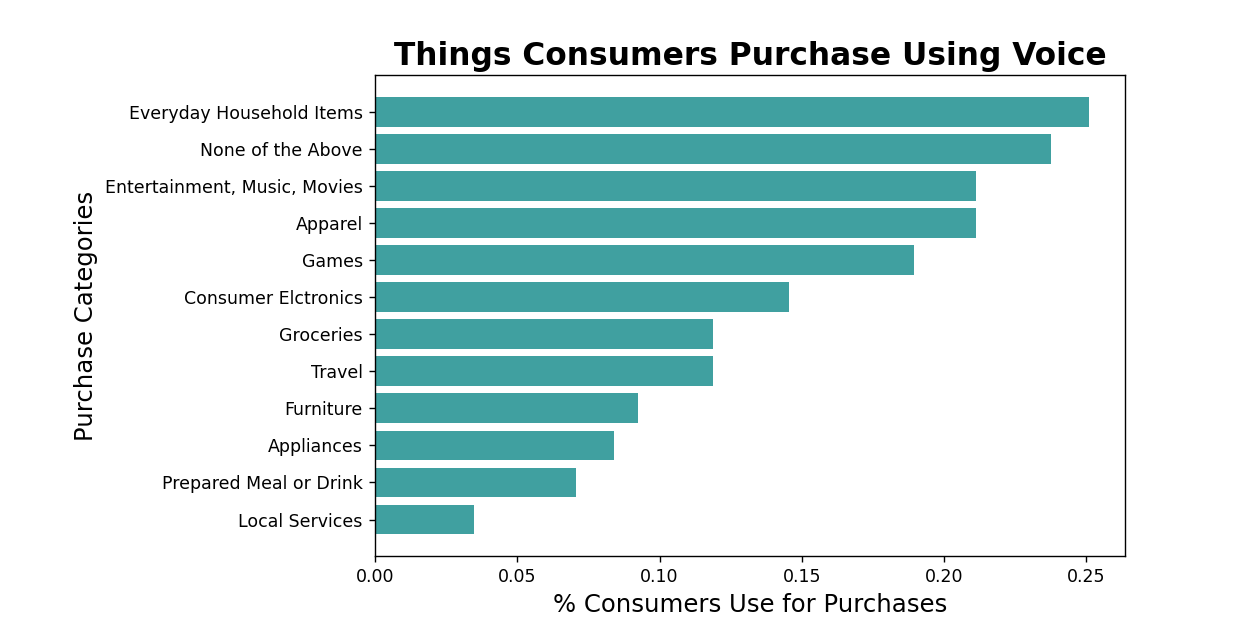

In [71]:
# Create horizontal bar plot

consumer_df.sort_values('Use Voice %',inplace=True)
x_axis = consumer_df["Use Voice %"]
y_axis = consumer_df["Categories"]

#ax = x_axis.plot(kind='barh', figsize=(8, 10), color='#86bf91', zorder=2, width=0.85)

plt.figure(figsize=[10, 5])
plt.figure(2)
plt.barh(y_axis,
         x_axis,
         alpha = 0.75,
         color = "teal",
         align="center")

#plt.yticks(y_axis)
#plt.yticklabels(y_axis)
#plt.invert_yaxis()  # labels read top-to-bottom
plt.ylabel('Purchase Categories', fontsize=14)
plt.xlabel('% Consumers Use for Purchases', fontsize=14)
plt.title('Things Consumers Purchase Using Voice', fontsize=18, fontweight = 'bold')
plt.subplots_adjust(left=0.3, bottom=None, right=None, top=None, wspace=None, hspace=None)

#def autolabel(rects):
    # attach some text labels
#    for rect in rects:
#        height = rect.get_height()
#        plt.text(rect.get_x() + rect.get_width()/2., 1.05*height,
#                '%d' % int(height),
#                ha='center', va='bottom')

#autolabel(rects1)
#autolabel(rects2)

plt.show()

In [42]:
# Save and export pie plot to png

plt.savefig("Output_Files/Consumer_purchase_categories.png")